# For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# SF Temps Data

In [2]:
from vega_datasets import data
df1 = data.sf_temps()

In [20]:
df1.head(1)

,temp,date
0,47.8,2010-01-01


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [22]:
df1.date

0      2010-01-01 00:00:00
1      2010-01-01 01:00:00
2      2010-01-01 02:00:00
3      2010-01-01 03:00:00
4      2010-01-01 04:00:00
               ...        
8754   2010-12-31 19:00:00
8755   2010-12-31 20:00:00
8756   2010-12-31 21:00:00
8757   2010-12-31 22:00:00
8758   2010-12-31 23:00:00
Name: date, Length: 8759, dtype: datetime64[ns]

In [23]:
df1 = df1.set_index('date')
df1

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


## 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

Text(0.5, 0, 'Day with Label for Month')

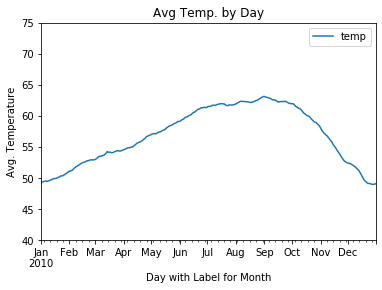

In [24]:
df1.resample('D').mean().plot().set_ylim([40,75])
plt.title('Avg Temp. by Day')
plt.ylabel('Avg. Temperature')
plt.xlabel('Day with Label for Month')

## 2. Write the code necessary to visualize the minimum temperature over time.

Text(0.5, 0, 'Day with Label for Month')

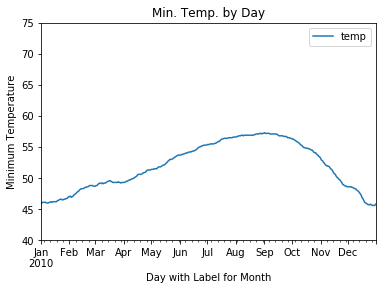

In [25]:
df1.resample('D').min().plot().set_ylim([40,75])
plt.title('Min. Temp. by Day')
plt.ylabel('Minimum Temperature')
plt.xlabel('Day with Label for Month')

## 3. Write the code necessary to visualize the maximum temperature over time.

Text(0.5, 0, 'Day with Label for Month')

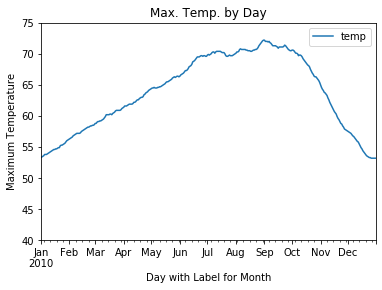

In [26]:
df1.resample('D').max().plot().set_ylim([40,75])
plt.title('Max. Temp. by Day')
plt.ylabel('Maximum Temperature')
plt.xlabel('Day with Label for Month')

## 4. Which month is the coldest, on average?

In [27]:
df1.resample('M').mean().index.max()

Timestamp('2010-12-31 00:00:00', freq='M')

In [28]:
df1.resample('M').mean().idxmin()[0]

Timestamp('2010-01-31 00:00:00')

In [29]:
print('The coldest month is:\n', 
      df1.resample('M').mean().idxmin()[0], 
      'with an average of', 
      df1.resample('M').mean().min()[0])

The coldest month is:
 2010-01-31 00:00:00 with an average of 49.984139784946244


## 5. Which month has the highest average temperature?

In [30]:
print('The coldest month is:\n', 
      df1.resample('M').mean().idxmax()[0], 
      'with an average of', 
      df1.resample('M').mean().max()[0])

The coldest month is:
 2010-09-30 00:00:00 with an average of 62.48708333333335


## 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [31]:
df_min_max = df1.resample('D').agg(['min','max'])

In [32]:
df_min_max.columns

MultiIndex([('temp', 'min'),
            ('temp', 'max')],
           )

In [33]:
df_min_max['delta'] = df_min_max[('temp', 'max')] - df_min_max[('temp', 'min')]

In [34]:
df_min_max.head()

temp       delta
             min   max      
date                        
2010-01-01  45.8  53.3   7.5
2010-01-02  46.0  53.4   7.4
2010-01-03  46.1  53.5   7.4
2010-01-04  46.1  53.6   7.5
2010-01-05  46.1  53.8   7.7

In [35]:
df_min_max.delta.resample('M').mean()

date
2010-01-31     8.341935
2010-02-28     9.485714
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
2010-06-30    13.950000
2010-07-31    13.977419
2010-08-31    13.870968
2010-09-30    14.403333
2010-10-31    13.432258
2010-11-30    10.236667
2010-12-31     7.925806
Freq: M, Name: delta, dtype: float64

In [36]:
print('The months with the highest average change in temp is\n',
      df_min_max.delta.resample('M').mean().idxmax(),
      'with an average temperature delta of',
      df_min_max.delta.resample('M').mean().max())

The months with the highest average change in temp is
 2010-09-30 00:00:00 with an average temperature delta of 14.40333333333333


## Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

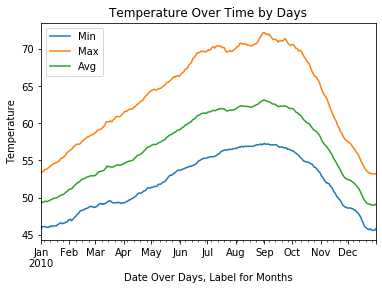

In [37]:
df1.resample('D').agg(['min','max','mean']).plot()
plt.title('Temperature Over Time by Days')
plt.xlabel('Date Over Days, Label for Months')
plt.ylabel('Temperature')
plt.legend(('Min','Max','Avg'))

# Seattle Weather Data

In [38]:
df2 = data.seattle_weather()

In [39]:
df2.head(1)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle


In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [41]:
df2 = df2.set_index('date')
df2

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


## 1. Which year and month combination has the highest amount of precipitation?

In [42]:
print('The year and month combination with the highest sum of precipitation is:\n')
print(df2.precipitation.resample('M').sum().idxmax())
print('\nwith the max sum of',df2.precipitation.resample('M').sum().max())

The year and month combination with the highest sum of precipitation is:

2015-12-31 00:00:00

with the max sum of 284.5000000000001


## 2. Visualize the amount of monthly precipitation over time.

Text(0, 0.5, 'Precipitation')

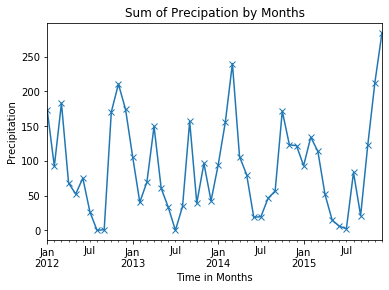

In [43]:
df2.precipitation.resample('M').sum().plot(marker='x')
plt.title('Sum of Precipation by Months')
plt.xlabel('Time in Months')
plt.ylabel('Precipitation')

## 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

Text(0, 0.5, 'Winds')

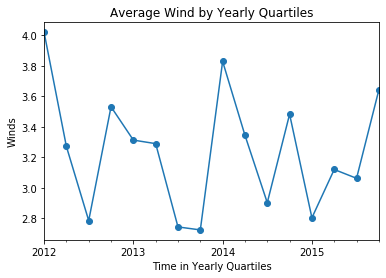

In [44]:
df2.wind.resample('Q').mean().plot(marker='o')
plt.title('Average Wind by Yearly Quartiles')
plt.xlabel('Time in Yearly Quartiles')
plt.ylabel('Winds')

## 4. Which year-month combination is the windiest?

Text(0, 0.5, 'Winds')

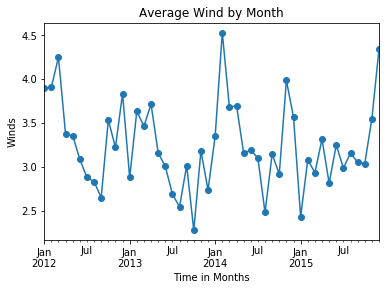

In [45]:
df2.wind.resample('M').mean().plot(marker='o')
plt.title('Average Wind by Month')
plt.xlabel('Time in Months')
plt.ylabel('Winds')

In [46]:
# can see visually with graph or using idxmax of aggregated months wind
print('The year and month combination with the highest average wind is:\n')
print(df2.wind.resample('M').mean().idxmax())
print('\nwith an average wind of',df2.wind.resample('M').mean().max())

The year and month combination with the highest average wind is:

2014-02-28 00:00:00

with an average wind of 4.5285714285714285


## 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [47]:
df2[df2.weather == 'sun'].resample('Y').count().weather

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: weather, dtype: int64

In [48]:
print('The year with the highest count of sunny days is:\n')
print(df2[df2.weather == 'sun'].resample('Y').count().weather.idxmax())
print('\nwith a sunny day count of',df2[df2.weather == 'sun'].resample('Y').count().weather.max())

The year with the highest count of sunny days is:

2014-12-31 00:00:00

with a sunny day count of 211


## 6. In which month does it rain the most?

In [49]:
df2.precipitation.resample('M').mean().max()

9.177419354838714

In [50]:
# can see visually with graph or using idxmax of aggregated months wind
print('The month combination with the highest average precipitation is:\n')
print(df2.precipitation.resample('M').mean().idxmax())
print('\nwith an average rainfall of',df2.precipitation.resample('M').mean().max())

The month combination with the highest average precipitation is:

2015-12-31 00:00:00

with an average rainfall of 9.177419354838714


## 7. Which month has the most number of days with a non-zero amount of precipitation?

In [63]:
print('The month with the most non-zero precipitation grade is:\n')
print(df2[df2.precipitation > 0].weather.resample('M').count().idxmax())
print('\nwith a count of',df2[df2.precipitation > 0].weather.resample('M').count().max())

The month with the most non-zero precipitation grade is:

2012-12-31 00:00:00

with a count of 27


# Flights Data

In [84]:
df3 = data.flights_20k()

In [85]:
df3.head(1)

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC


In [86]:
df3['weekday'] = df3.date.dt.day_name()
df3 = df3.set_index('date')
df3

,delay,distance,origin,destination,weekday
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,Saturday
2001-01-31 16:40:00,-5,1093,FLL,ISP,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,Sunday
2001-01-10 21:00:00,-15,550,MSY,MCO,Wednesday
2001-03-30 21:45:00,-2,229,STL,IND,Friday
...,...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK,Thursday
2001-01-19 13:05:00,-6,1489,SEA,MCI,Friday
2001-02-07 11:37:00,-16,1848,MCO,PHX,Wednesday


In [87]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-13 14:56:00 to 2001-03-14 11:33:00
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20000 non-null  int64 
 1   distance     20000 non-null  int64 
 2   origin       20000 non-null  object
 3   destination  20000 non-null  object
 4   weekday      20000 non-null  object
dtypes: int64(2), object(3)
memory usage: 937.5+ KB


## 1. Convert any negative delays to 0.

In [88]:
df3.delay = df3.delay.where((df3.delay > 0), 0)

In [89]:
df3.delay.value_counts()

0      10516
5        776
3        577
2        507
10       476
       ...  
148        1
213        1
245        1
360        1
147        1
Name: delay, Length: 194, dtype: int64

## 2. Which hour of the day has the highest average delay?

In [90]:
df3.delay.resample('H').mean()

date
2001-01-01 00:00:00    14.000000
2001-01-01 01:00:00          NaN
2001-01-01 02:00:00          NaN
2001-01-01 03:00:00          NaN
2001-01-01 04:00:00          NaN
                         ...    
2001-03-31 17:00:00    11.666667
2001-03-31 18:00:00    12.538462
2001-03-31 19:00:00    22.125000
2001-03-31 20:00:00    27.600000
2001-03-31 21:00:00    11.200000
Freq: H, Name: delay, Length: 2158, dtype: float64

In [91]:
print('The hour of day with the highest average delay is:\n')
print(df3.delay.resample('H').mean().idxmax())
print('\nat ',df3.delay.resample('H').mean().max())

The hour of day with the highest average delay is:

2001-02-23 03:00:00

at  360.0


## 3. Does the day of the week make a difference in the delay amount?

Text(0, 0.5, 'average delay')

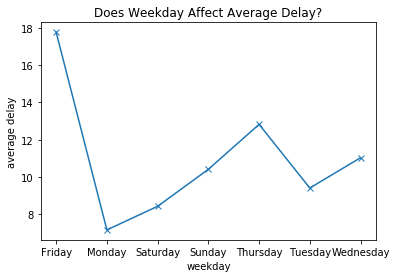

In [132]:
df3.groupby('weekday').mean().delay.plot(marker='x')
plt.title('Does Weekday Affect Average Delay?')
plt.ylabel('average delay')

## 4. Does the month make a difference in the delay amount?

Text(0, 0.5, 'average delay')

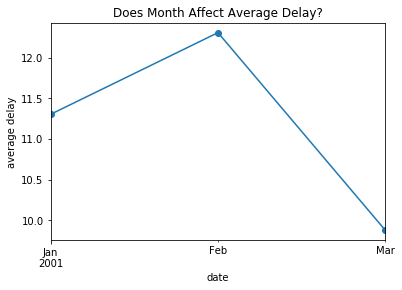

In [138]:
# I believe not enough data on months to know for sure, but between the three yes
df3.resample('M').mean().delay.plot(marker='o')
plt.title('Does Month Affect Average Delay?')
plt.ylabel('average delay')

# Bonus

In [3]:
df4 = data.iowa_electricity()

In [4]:
df4.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [5]:
df4.shape

(51, 3)

In [6]:
# for each year, there are 3 sources
df4.source.value_counts(), df4.source.value_counts()

(Nuclear Energy    17
 Renewables        17
 Fossil Fuels      17
 Name: source, dtype: int64,
 Nuclear Energy    17
 Renewables        17
 Fossil Fuels      17
 Name: source, dtype: int64)

In [ ]:
df4 = df4.set_index('year')

In [11]:
df4.head()

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2002-01-01,Fossil Fuels,35991
2003-01-01,Fossil Fuels,36234
2004-01-01,Fossil Fuels,36205
2005-01-01,Fossil Fuels,36883


## 1. For each row, calculate the percentage of the year's total that energy source provided.

In [34]:
year_energy = pd.DataFrame(df4.groupby(['year','source'])['net_generation'].sum())

In [38]:
year_total = year_energy.groupby('year').sum()

In [50]:
year_energy = year_energy.join(year_total, lsuffix='year', rsuffix='net_generation', how='left')

In [52]:
year_energy.head(5)

net_generationyear  net_generationnet_generation
year       source                                                          
2001-01-01 Fossil Fuels                 35361                         40651
           Nuclear Energy                3853                         40651
           Renewables                    1437                         40651
2002-01-01 Fossil Fuels                 35991                         42528
           Nuclear Energy                4574                         42528

In [54]:
year_energy.columns = ['source_generation','net_year']

In [56]:
year_energy['year_percentage'] = (year_energy.source_generation / year_energy.net_year ) * 100

In [58]:
year_energy.head(10)

source_generation  net_year  year_percentage
year       source                                                      
2001-01-01 Fossil Fuels                35361     40651        86.986790
           Nuclear Energy               3853     40651         9.478242
           Renewables                   1437     40651         3.534968
2002-01-01 Fossil Fuels                35991     42528        84.628950
           Nuclear Energy               4574     42528        10.755267
           Renewables                   1963     42528         4.615783
2003-01-01 Fossil Fuels                36234     42107        86.052200
           Nuclear Energy               3988     42107         9.471109
           Renewables                   1885     42107         4.476690
2004-01-01 Fossil Fuels                36205     43236        83.738089

## 2. Lineplot of generation over time, color by source

## 3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [101]:
pd.pivot_table(df4, values='net_generation', index='year', columns='source').T

year,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


## 4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

Text(0, 0.5, 'Source Net Generation')

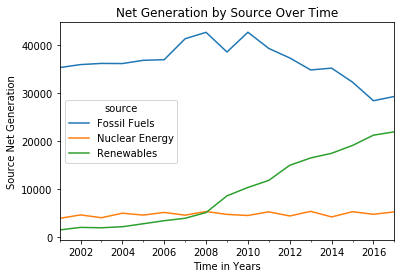

In [106]:
pd.pivot_table(df4, values='net_generation', index='year', columns='source').plot()
plt.title('Net Generation by Source Over Time')
plt.xlabel('Time in Years')
plt.ylabel('Source Net Generation')

## 5. Is the total generation increasing over time?

Text(0.5, 0, 'Time in Year')

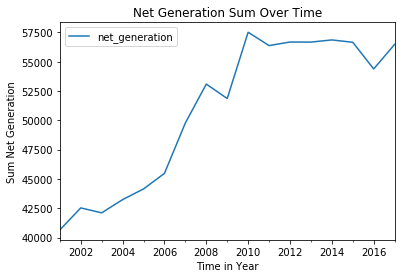

In [107]:
df4.resample('Y').sum().plot()
plt.title('Net Generation Sum Over Time')
plt.ylabel('Sum Net Generation')
plt.xlabel('Time in Year')

## 5a. How would you control for increasing consumption over time when considering how much energy is coming from each source?

Divide by population over time, would have the percentage of energy consumption by individual or an arbitrary number like nergy consumption for every 1,000 people

## 5b. express each number as a % of the year's total

## Use the sf_temps dataset
## 1. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

## 2. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

## 3. Create pretty labels for time plots

## 4. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar